In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
import os

import numpy as np

from matplotlib import pyplot

from scipy import optimize

from sklearn.model_selection import train_test_split

%matplotlib inline

import pandas as pd
import sklearn as skl

from sklearn.preprocessing import StandardScaler

In [109]:
url = "/content/drive/MyDrive/Colab Notebooks/Datasets/cardio_train.csv"
dataframe = pd.read_csv(url)

print(dataframe)
x = dataframe.iloc[:, 1:].values
y = dataframe.iloc[:, 12].values

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0 

In [110]:
print(x)
print(y)

[[1.8393e+04 2.0000e+00 1.6800e+02 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [2.0228e+04 1.0000e+00 1.5600e+02 ... 0.0000e+00 1.0000e+00 1.0000e+00]
 [1.8857e+04 1.0000e+00 1.6500e+02 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 ...
 [1.9066e+04 2.0000e+00 1.8300e+02 ... 1.0000e+00 0.0000e+00 1.0000e+00]
 [2.2431e+04 1.0000e+00 1.6300e+02 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [2.0540e+04 1.0000e+00 1.7000e+02 ... 0.0000e+00 1.0000e+00 0.0000e+00]]
[0 1 1 ... 1 1 0]


In [111]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [112]:
def calculate_cost(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = (1/m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h)))
    return cost

In [113]:
def gradient(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    grad = (1/m) * np.dot(X.T, (h - y))
    return grad

In [114]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    for i in range(num_iters):
        theta -= alpha * gradient(theta, X, y)
        J_history.append(calculate_cost(theta, X, y))
    return theta, J_history

In [115]:
def feature_normalize(X):
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [116]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [117]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [118]:
X_train_norm = np.c_[np.ones((X_train_norm.shape[0], 1)), X_train_norm]
X_test_norm = np.c_[np.ones((X_test_norm.shape[0], 1)), X_test_norm]

In [143]:
alpha = 0.01
num_iters = 3000

In [144]:
theta = np.zeros(X_train_norm.shape[1])

In [145]:
theta, J_history = gradient_descent(X_train_norm, y_train, theta, alpha, num_iters)

In [141]:
predictions = sigmoid(np.dot(X_test_norm, theta))
predictions[predictions >= 0.5] = 1
predictions[predictions < 0.5] = 0
accuracy = np.mean(predictions == y_test)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.9999285714285714


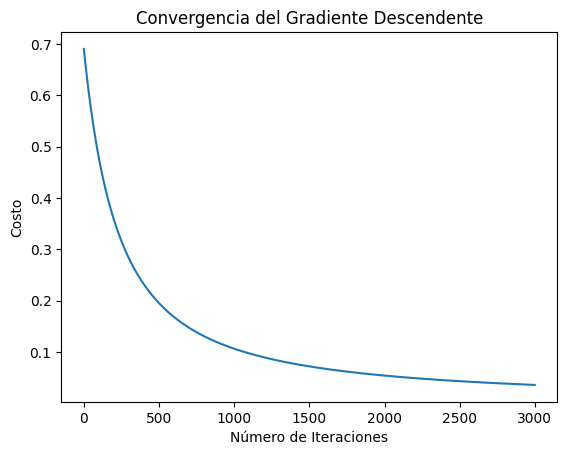

theta calculado por el descenso por el gradiente: [-1.68307748e-03  2.33305044e-01  1.59710342e-02 -3.15393847e-02
  1.74654618e-01  5.10727313e-02  5.46792279e-02  2.01285249e-01
 -1.10759437e-02 -1.63211446e-02 -1.70969754e-02 -3.23084185e-02
  3.24965936e+00]


In [146]:
pyplot.plot(range(num_iters), J_history)
pyplot.xlabel('Número de Iteraciones')
pyplot.ylabel('Costo')
pyplot.title('Convergencia del Gradiente Descendente')
pyplot.show()
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [147]:
print(X_test)
print(theta)

[[2.1770e+04 1.0000e+00 1.5600e+02 ... 0.0000e+00 1.0000e+00 1.0000e+00]
 [2.1876e+04 1.0000e+00 1.7000e+02 ... 0.0000e+00 1.0000e+00 1.0000e+00]
 [2.3270e+04 1.0000e+00 1.5100e+02 ... 0.0000e+00 1.0000e+00 1.0000e+00]
 ...
 [2.2607e+04 1.0000e+00 1.6500e+02 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.9670e+04 1.0000e+00 1.5700e+02 ... 0.0000e+00 1.0000e+00 1.0000e+00]
 [1.8320e+04 2.0000e+00 1.7600e+02 ... 0.0000e+00 0.0000e+00 1.0000e+00]]
[-1.68307748e-03  2.33305044e-01  1.59710342e-02 -3.15393847e-02
  1.74654618e-01  5.10727313e-02  5.46792279e-02  2.01285249e-01
 -1.10759437e-02 -1.63211446e-02 -1.70969754e-02 -3.23084185e-02
  3.24965936e+00]


In [148]:
from sklearn.svm import SVC

classifier =  SVC()

classifier.fit(X_train, y_train)

print(classifier.score(X_test, y_test))

0.6052142857142857


En este ejercicio se uso el dataset D1, y debido a los datos binarios que poseia tal dataset se decicio usar el modelo de Clasificacion
se procesaron los datos usando pandas, tambien se los separo en 80% para entrenamiento y 20% para pruebas.
se realizaron pruebas con valores de entre 1000 y 10000 iteraciones, se decidio dejarlo en 3000 debido a que la curva de la grafica de costo no baja tan abruptamente como con 10000 iteraciones o la casi recta que dan las 1000 iteraciones

los resultados brindados con los datos de entrenamiento y 5000 iteraciones dan un 0.9999 o 99.99% de precision, mientras que al realizar la comparacion usando los datos de prueba con el modulo SVC arroja un resultado de 0.60... o 61% de precision